In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc

In [4]:
data = pd.read_csv('creditcard.csv')

legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [6]:
legit_sample = legit.sample(n=len(fraud), random_state=42)
balanced_data = pd.concat([legit_sample, fraud], axis=0)

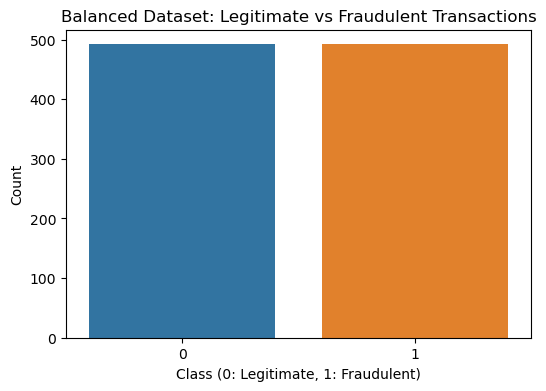

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=balanced_data)
plt.title('Balanced Dataset: Legitimate vs Fraudulent Transactions')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()


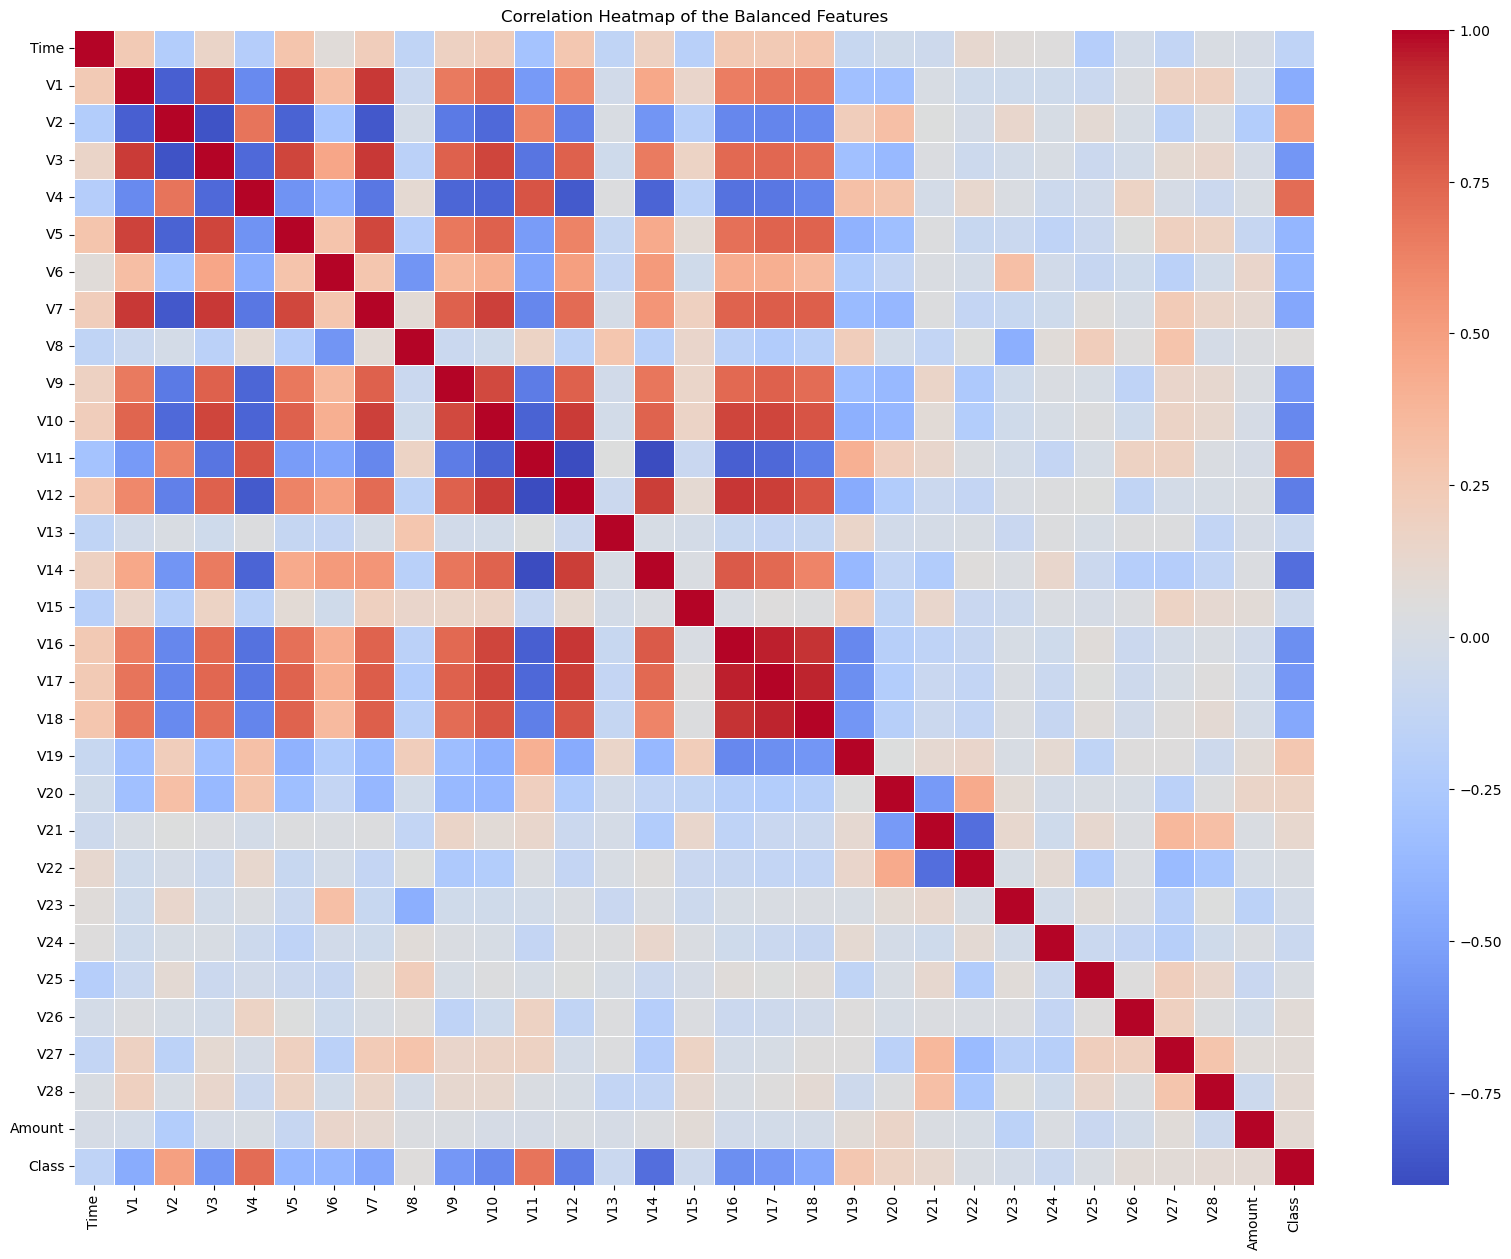

In [24]:
plt.figure(figsize=(20,15))
corr_balanced = balanced_data.corr()
sns.heatmap(corr_balanced, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of the Balanced Features')
plt.show()

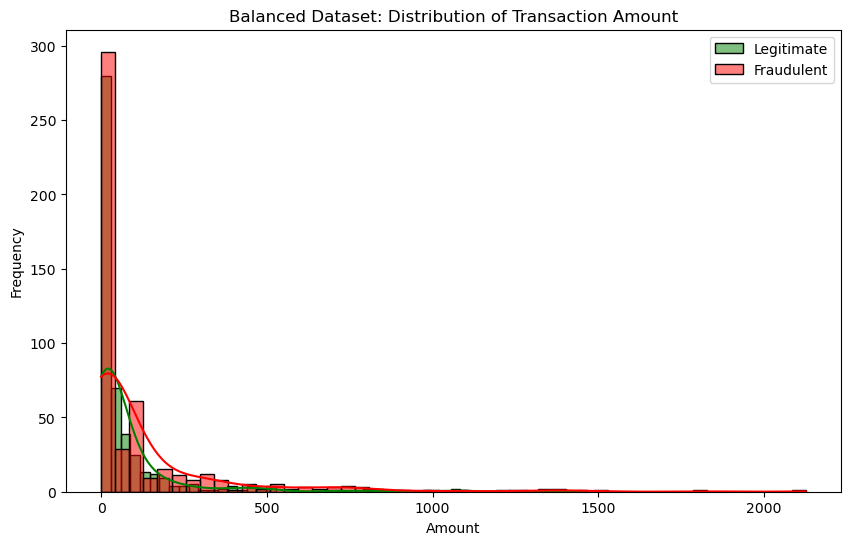

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(data=balanced_data[balanced_data['Class'] == 0]['Amount'], color='green', bins=50, label='Legitimate', kde=True)
sns.histplot(data=balanced_data[balanced_data['Class'] == 1]['Amount'], color='red', bins=50, label='Fraudulent', kde=True)
plt.title('Balanced Dataset: Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

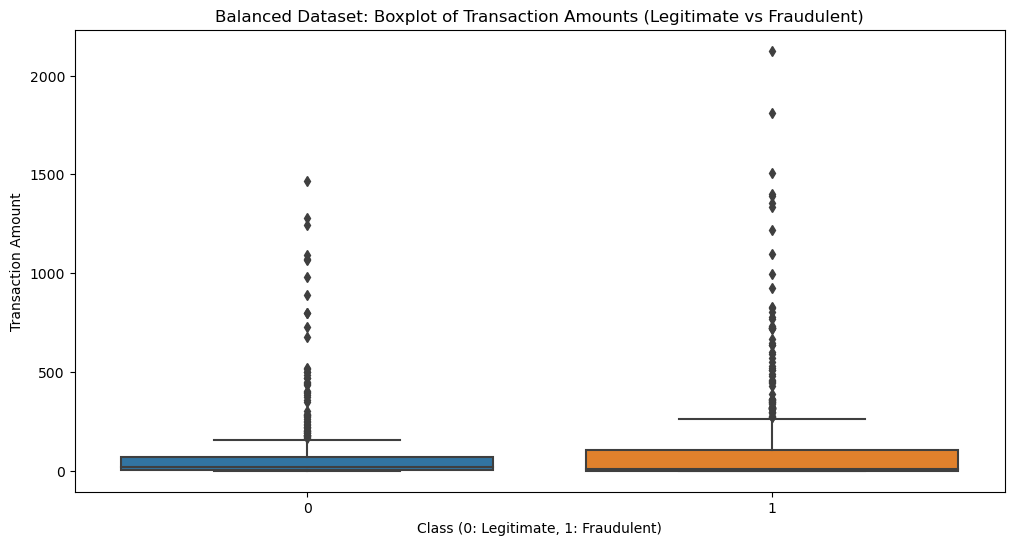

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Class', y='Amount', data=balanced_data)
plt.title('Balanced Dataset: Boxplot of Transaction Amounts (Legitimate vs Fraudulent)')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Transaction Amount')
plt.show()


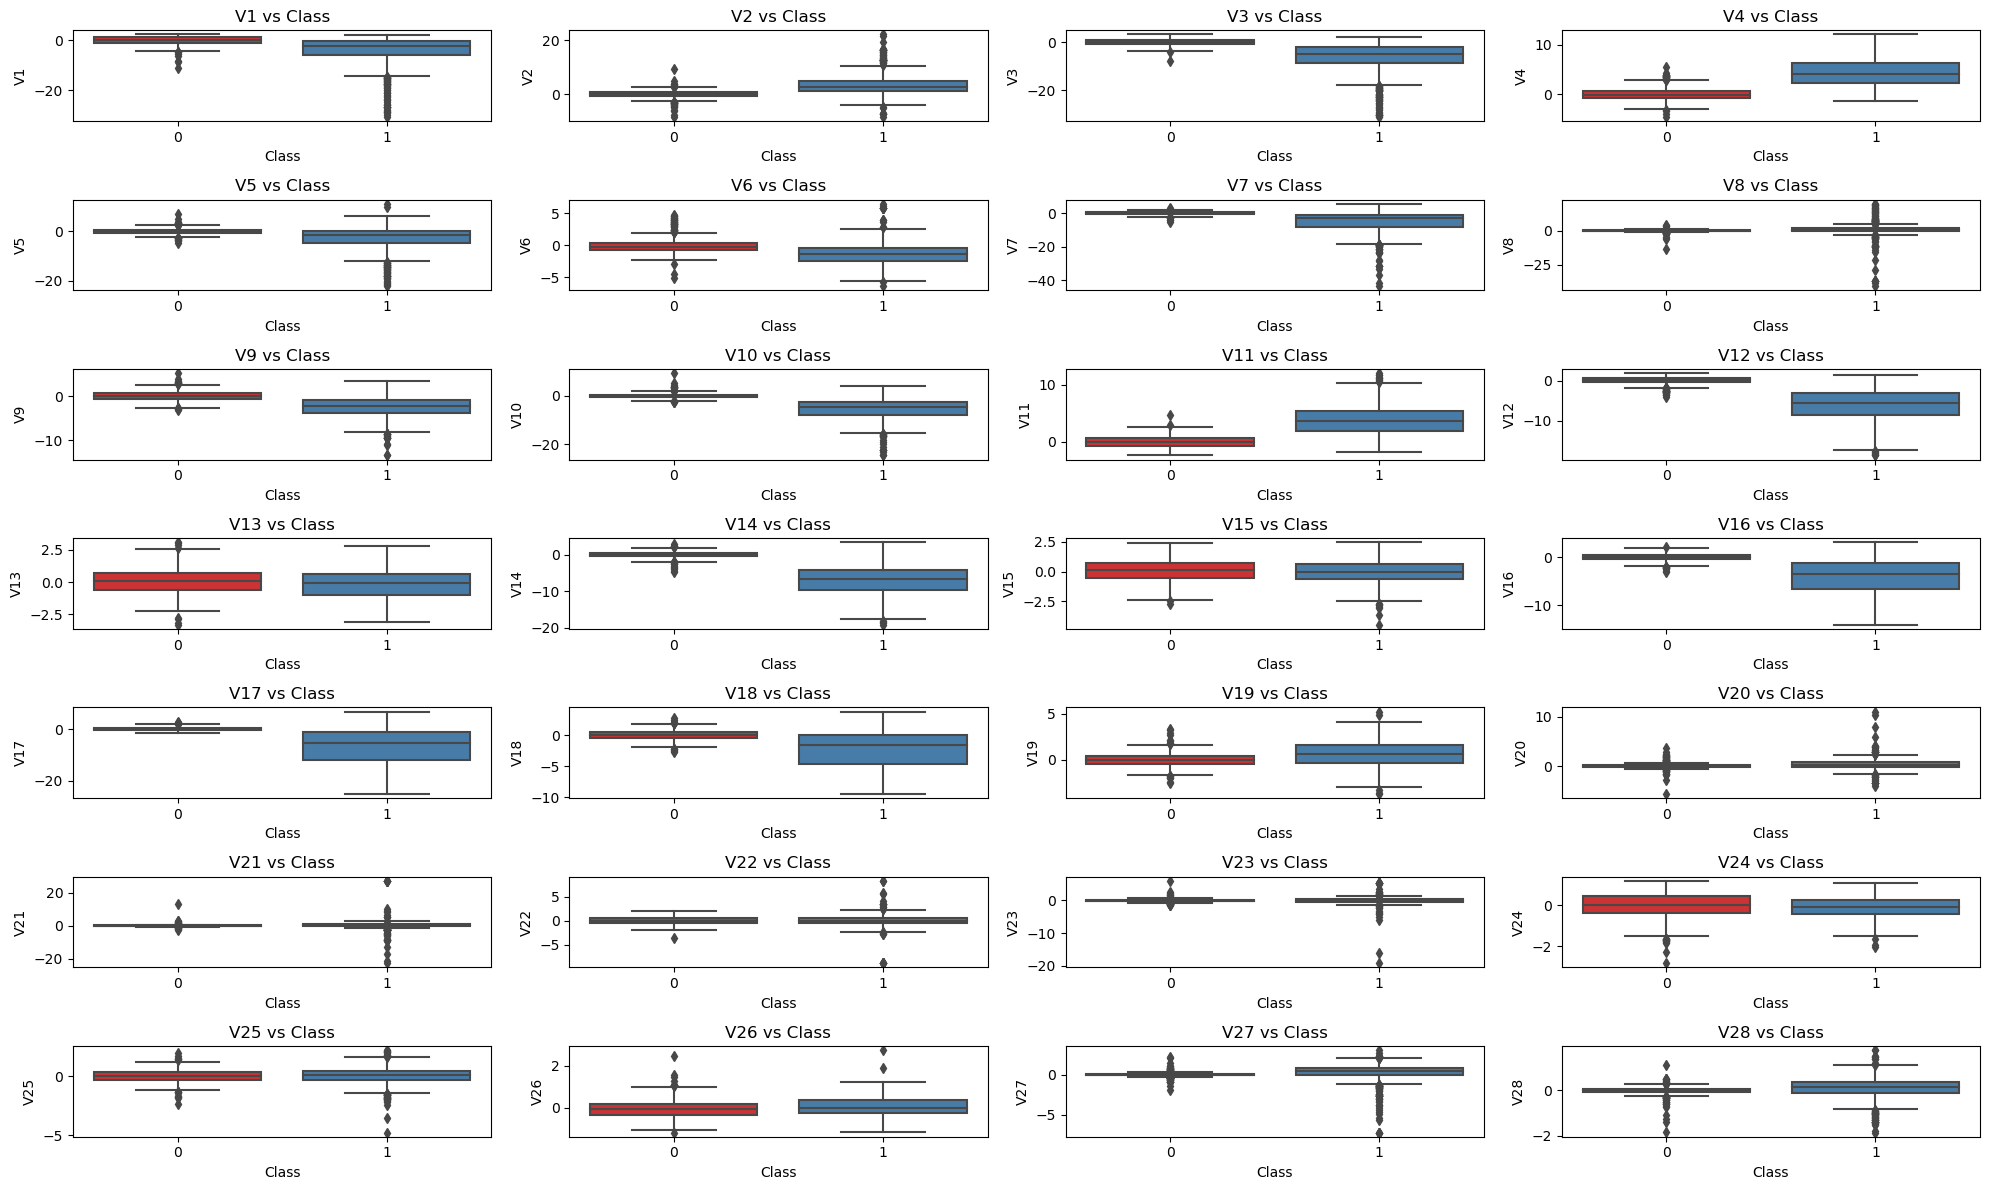

In [30]:
plt.figure(figsize=(20,12))
for i, feature in enumerate(balanced_data.columns[1:29]):
    plt.subplot(7, 4, i+1)
    sns.boxplot(x='Class', y=feature, data=balanced_data, palette="Set1")
    plt.title(f'{feature} vs Class')
    plt.tight_layout()
plt.show()

In [12]:
X = balanced_data.drop(columns="Class", axis=1)
y = balanced_data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [14]:
y_probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

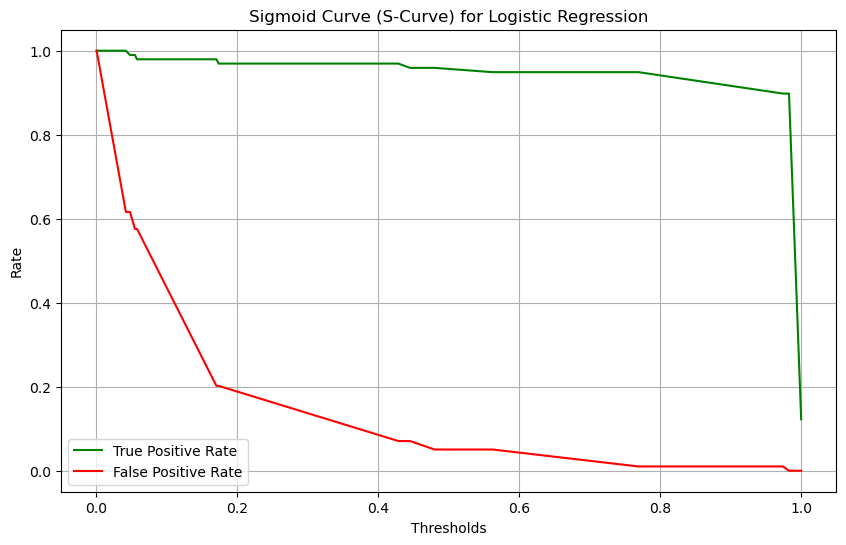

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, tpr, label='True Positive Rate', color='green')
plt.plot(thresholds, fpr, label='False Positive Rate', color='red')
plt.title('Sigmoid Curve (S-Curve) for Logistic Regression')
plt.xlabel('Thresholds')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
train_acc = accuracy_score(model.predict(X_train), y_train)
test_acc = accuracy_score(model.predict(X_test), y_test)
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.9339
Test Accuracy: 0.9492


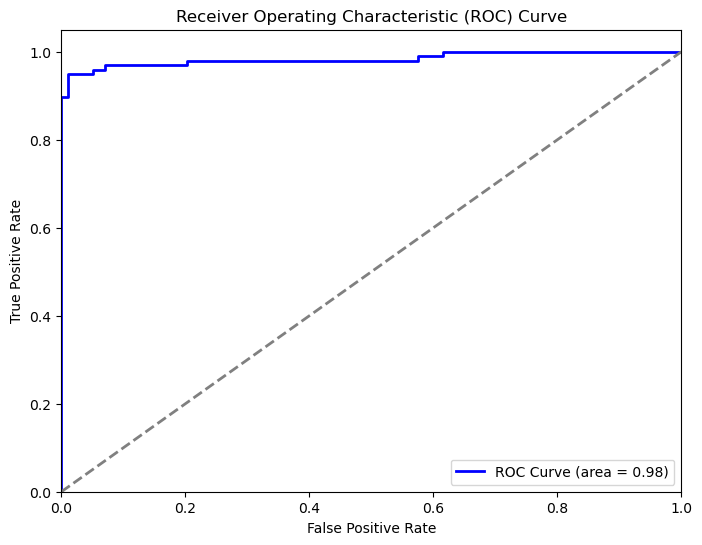

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()